In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 32EA-CE9F

 Directory of C:\Users\HP\Music\tech resume projects\DC to DC power supply fault prediction

10-04-2025  00:15    <DIR>          .
10-04-2025  00:14    <DIR>          ..
10-04-2025  00:15    <DIR>          .ipynb_checkpoints
10-04-2025  00:13           189,689 dc_dc_converter_simulated_data.csv
10-04-2025  00:15               337 Untitled.ipynb
               2 File(s)        190,026 bytes
               3 Dir(s)  204,708,442,112 bytes free


In [4]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd

In [6]:
data=pd.read_csv("dc_dc_converter_simulated_data.csv")

In [18]:
data.head()

,Vin,DutyCycle,Vout,Iout,Temp,Condition
0,12.529804,0.583063,7.262261,1.087942,30.894570,0
1,15.277982,0.869517,14.145995,2.485156,79.765066,1
2,17.521012,0.702169,12.775371,2.626097,67.831729,1
3,14.742691,0.681802,9.596749,3.003652,77.813581,1
4,11.996397,0.547656,6.238925,1.024288,42.824212,0


In [10]:
print("shape of data is : ", data.shape)


shape of data is :  (2000, 6)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Vin        2000 non-null   float64
 1   DutyCycle  2000 non-null   float64
 2   Vout       2000 non-null   float64
 3   Iout       2000 non-null   float64
 4   Temp       2000 non-null   float64
 5   Condition  2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.9 KB


In [16]:
data.describe()

,Vin,DutyCycle,Vout,Iout,Temp,Condition
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,13.962928,0.650363,9.372266,1.753649,54.816645,0.500000
std,2.507449,0.167514,3.766363,0.839193,16.907448,0.500125
min,8.758733,0.352981,3.832752,0.581672,24.116481,0.000000
25%,11.965219,0.503189,5.997844,0.999194,39.897599,0.000000
50%,13.302050,0.603285,7.900819,1.247020,49.879132,0.500000
75%,15.912811,0.794365,12.549562,2.509344,70.032749,1.000000
max,22.196599,1.152906,20.673371,4.188691,97.683736,1.000000


In [20]:
data.isna().sum()

Vin          0
DutyCycle    0
Vout         0
Iout         0
Temp         0
Condition    0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [34]:
data["Condition"].value_counts()

Condition
0    1000
1    1000
Name: count, dtype: int64

<Axes: xlabel='Temp', ylabel='Count'>

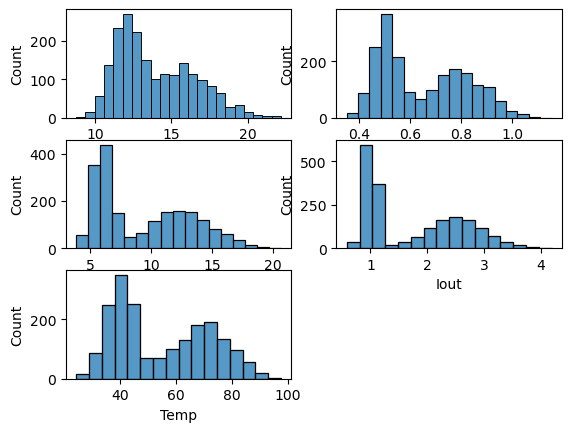

In [42]:
plt.subplot(3,2,1)
sns.histplot(data["Vin"])
plt.subplot(3,2,2)
sns.histplot(data["DutyCycle"])
plt.subplot(3,2,3)
sns.histplot(data["Vout"])
plt.subplot(3,2,4)
sns.histplot(data["Iout"])
plt.subplot(3,2,5)
sns.histplot(data["Temp"])

<Axes: ylabel='Temp'>

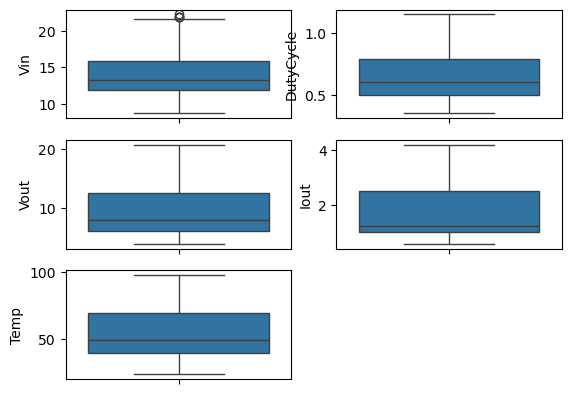

In [44]:
plt.subplot(3,2,1)
sns.boxplot(data["Vin"])
plt.subplot(3,2,2)
sns.boxplot(data["DutyCycle"])
plt.subplot(3,2,3)
sns.boxplot(data["Vout"])
plt.subplot(3,2,4)
sns.boxplot(data["Iout"])
plt.subplot(3,2,5)
sns.boxplot(data["Temp"])

In [46]:
data.corr()

,Vin,DutyCycle,Vout,Iout,Temp,Condition
Vin,1.000000,0.681014,0.885690,0.702201,0.683923,0.775323
DutyCycle,0.681014,1.000000,0.929033,0.788299,0.780521,0.876692
Vout,0.885690,0.929033,1.000000,0.797916,0.780949,0.881929
Iout,0.702201,0.788299,0.797916,1.000000,0.794770,0.900520
Temp,0.683923,0.780521,0.780949,0.794770,1.000000,0.891133
Condition,0.775323,0.876692,0.881929,0.900520,0.891133,1.000000


<Axes: >

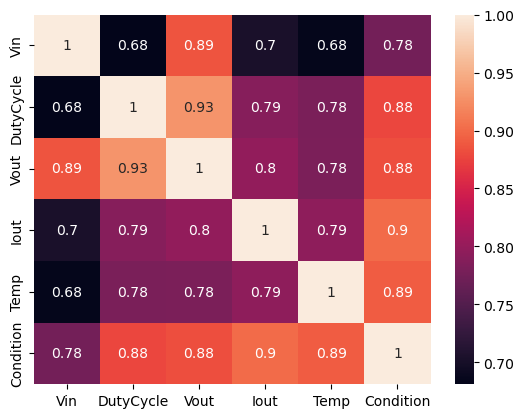

In [51]:
sns.heatmap(data.corr(),annot=True)
# to check correlation

<Axes: xlabel='Condition', ylabel='count'>

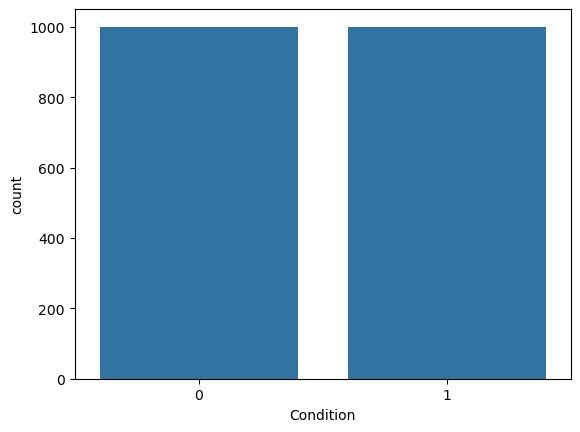

In [55]:
sns.countplot(data=data,x="Condition")
# To check does target is balanced or not

In [63]:
feature=data.drop(columns={"Condition"})
target=data["Condition"]

In [69]:
# for scaling
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(feature)

In [75]:
#for spliting test and trainging data
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,target,test_size=0.2,random_state=42,stratify=target)

In [83]:
# for model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [101]:
model=Sequential([
    Dense(64,activation="relu",input_shape=(X_train.shape[1],)),
    Dense(32,activation="relu"),
    Dense(1,activation="sigmoid")
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [108]:
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7346 - loss: 0.4760 - val_accuracy: 1.0000 - val_loss: 0.1449
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9998 - loss: 0.0996 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9997 - loss: 0.0319 - val_accuracy: 1.0000 - val_loss: 0.0136
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9986 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9991 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss

In [112]:
history.history

{'accuracy': [0.8890625238418579,
  0.999218761920929,
  0.999218761920929,
  0.999218761920929,
  0.999218761920929,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.3444562256336212,
  0.07378651201725006,
  0.023290542885661125,
  0.010490180924534798,
  0.0061594839207828045,
  0.004148132633417845,
  0.003064478747546673,
  0.0023690080270171165,
  0.0018934819381684065,
  0.001554837916046381,
  0.0013010798720642924,
  0.0011054995702579618,
  0.0009456205298192799,
  0.0008202774333767593,
  0.0007270656060427427,
  0.0006356664816848934,
  0.0005656256689690053,
  0.0005058430251665413,
  0.0004573483602143824,
  0.00040874112164601684,
  0.00037062432966195047,
  0.0003368343459442258,
  0.000304964982

In [114]:
history_data=pd.DataFrame(history.history)

Text(0, 0.5, 'Accuracy')

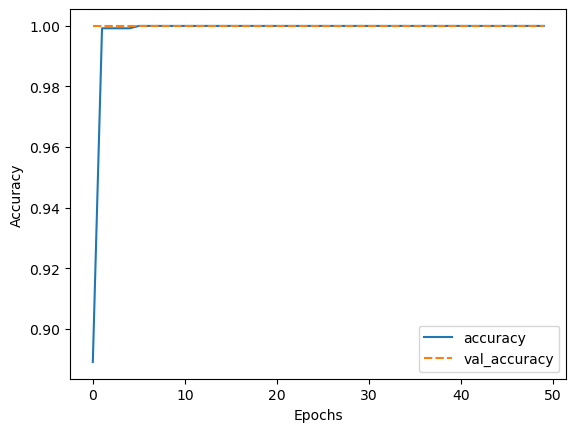

In [122]:
sns.lineplot(history_data[["accuracy","val_accuracy"]])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'loss')

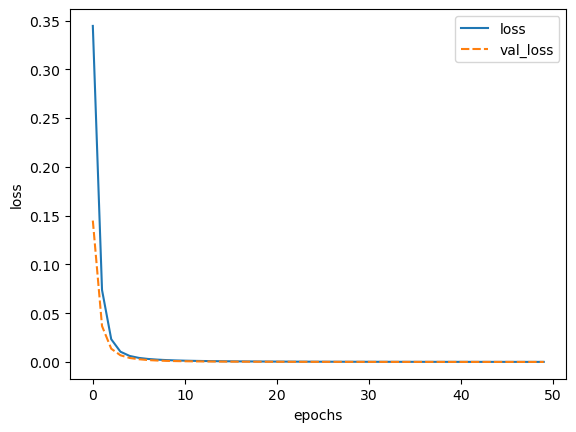

In [126]:
sns.lineplot(history_data[["loss","val_loss"]])
plt.xlabel("epochs")
plt.ylabel("loss")

In [130]:
loss,accuracy=model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.0689e-05 


In [138]:
print("model accuracy is ",accuracy)


model accuracy is  1.0


In [144]:
from sklearn.metrics import confusion_matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0.5, 1.0, 'Confusion Matrix')

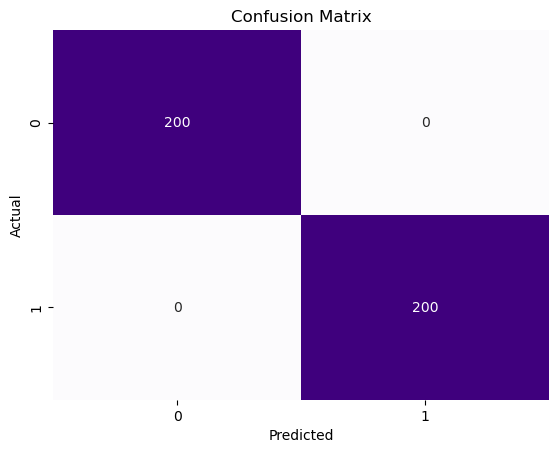

In [148]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [152]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

